In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch

In [2]:
import h5py
Lab1_MNIST = h5py.File('MNISTdata.hdf5','r') # Loading the h5py file
data_in=np.array(Lab1_MNIST['input'])        #converting the file to numpy array (input data)
data_out=np.array(Lab1_MNIST['output'])      #converting the file to numpy array (output data)
print(data_in.shape)
print(data_out.shape)

(2000, 28, 28, 1)
(2000, 1)


In [3]:
# splitting the data into 70 % and 30% testing
train_X,test_X, train_y, test_y = train_test_split(data_in,data_out,test_size=0.3,random_state=21)
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(1400, 28, 28, 1)
(600, 28, 28, 1)
(1400, 1)
(600, 1)


[4]


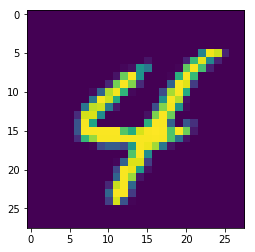

[1]


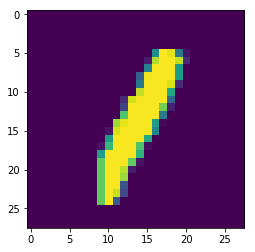

[3]


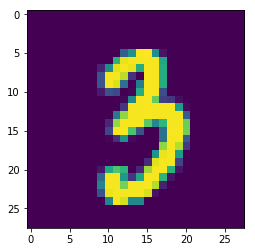

[4]


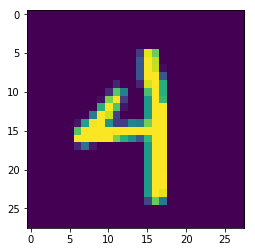

[6]


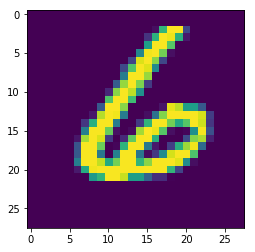

In [4]:
# Showing images and labels of first 5 data in the test data
for i in range(5):
    image =test_X[i].reshape(28,28)
    label = test_y[i]
    plt.imshow(image)
    print(label)
    plt.show()

In [5]:
#reshaping the input data as (2000,784) and output data as column of 2000
X_train=train_X.reshape(-1,784)
X_test=test_X.reshape(-1,784)
y_train=train_y.reshape(1400)
y_test=test_y.reshape(600)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 784)
(600, 784)
(1400,)
(600,)


In [6]:
# coverting numpy array to tensor and datatype float(for input) and integer for output
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([1400, 784])
torch.Size([600, 784])
torch.Size([1400])
torch.Size([600])


In [7]:
#zipping the input data X and labels y together for test data and train data separately
train_data= list(zip(X_train,y_train))
test_data = list(zip(X_test,y_test))

In [8]:
# Loading data in batches of 64 size and checking it using for loop

trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
testloader = DataLoader(test_data,batch_size=64, shuffle=False)
for images, labels in trainloader:
    print('Batch shape:', images.size())
    break
for i in trainloader:
    print(i)

Batch shape: torch.Size([64, 784])
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([7, 8, 1, 2, 0, 2, 9, 0, 0, 6, 6, 0, 1, 4, 6, 8, 7, 1, 5, 5, 9, 6, 5, 7,
        6, 6, 3, 1, 5, 1, 8, 7, 4, 7, 9, 4, 7, 0, 3, 6, 3, 5, 0, 7, 7, 8, 3, 5,
        5, 4, 9, 3, 0, 4, 7, 9, 6, 7, 9, 6, 6, 4, 7, 0])]
[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([8, 5, 3, 2, 4, 1, 0, 3, 8, 9, 9, 2, 0, 3, 8, 8, 6, 7, 6, 8, 1, 7, 2, 2,
        0, 0, 6, 6, 1, 4, 1, 5, 6, 3, 7, 3, 4, 3, 4, 9, 9, 7, 5, 8, 7, 6, 8, 8,
        5, 6, 4, 8, 2, 6, 1, 1, 4, 5, 0, 4, 4, 5, 0, 4])]
[tensor([[0., 0.,

In [9]:
# Creating a model class
class Model_1(nn.Module):
    def __init__(self,in_features=784,h1 = 50, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)  # input layer to hidden layer
        self.out = nn.Linear(h1,out_features) # hidden layer to output layer 
    def forward(self,x):
        x = torch.sigmoid(self.fc1(x))
        x = self.out(x)
        return F.log_softmax(x,dim=1)
torch.manual_seed(4)
model_1 = Model_1()
model_1

Model_1(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (out): Linear(in_features=50, out_features=10, bias=True)
)

In [10]:
# Showing number of parameters
for item in model_1.parameters():
    print(item.numel())

39200
50
500
10


In [11]:
# Setting up loss function and optimizer function
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),lr=0.05,weight_decay=1e-3)

In [12]:
# Training the model with 100 epochs
import time
start_time = time.time()
epoch=50
trn_loss1=[]
tst_loss1=[]
tst_corr = []
trn_corr = []
for i in range(epoch):
    num_tst_corr = 0
    num_trn_corr = 0
    for b,(X_tr,y_tr) in enumerate(trainloader):
        b+=1
        y_predicted = model_1(X_tr)
        trnl_1=loss(y_predicted,y_tr)
        
        predicted = torch.max(y_predicted.data, 1)[1]    # this calculates the index of maximum value in one hot vector
        batch_corr = (predicted == y_tr).sum()   # this compares target value with model prediction
        num_trn_corr += batch_corr                  # summing up number of correct predictions by the model
        
        optimizer.zero_grad()
        trnl_1.backward()
        optimizer.step()
    
    trn_loss1.append(trnl_1.item())    
    if i%5==0:
        print(f' epoch: {i+1}     train_loss: {trnl_1.item()}')
    
    trn_corr.append(num_trn_corr)
    
    # Cecking the model for the test data (this part is not the par tof backward computation so without gradient)
    with torch.no_grad():
        for c,(X_tst,y_tst) in enumerate(testloader):
            c+=1
            y_val = model_1(X_tst)
            tstl_1=loss(y_val,y_tst)
            
            pred = torch.max(y_val.data, 1)[1]
            batch_corr_test = (pred == y_tst).sum()
            num_tst_corr += batch_corr_test
            
        tst_loss1.append(tstl_1.item())
        if i%5==0:
            print(f' epoch: {i+1}     test_loss: {tstl_1.item()}')
    tst_corr.append(num_tst_corr)
    
end_time = time.time()
total_time = end_time - start_time
print(f'total time: {total_time}')

 epoch: 1     train_loss: 1.8426975011825562
 epoch: 1     test_loss: 1.8511990308761597
 epoch: 6     train_loss: 1.8173972368240356
 epoch: 6     test_loss: 2.083674669265747
 epoch: 11     train_loss: 1.5655831098556519
 epoch: 11     test_loss: 1.7595113515853882
 epoch: 16     train_loss: 1.9597132205963135
 epoch: 16     test_loss: 2.2149569988250732
 epoch: 21     train_loss: 1.6178301572799683
 epoch: 21     test_loss: 1.8857194185256958
 epoch: 26     train_loss: 1.4095999002456665
 epoch: 26     test_loss: 1.8117269277572632
 epoch: 31     train_loss: 2.1548845767974854
 epoch: 31     test_loss: 1.693333625793457
 epoch: 36     train_loss: 1.647838830947876
 epoch: 36     test_loss: 1.6538902521133423
 epoch: 41     train_loss: 1.5977404117584229
 epoch: 41     test_loss: 1.6158967018127441
 epoch: 46     train_loss: 1.9965388774871826
 epoch: 46     test_loss: 2.177011251449585
total time: 6.006541013717651


Text(0.5, 1.0, 'EPochs vs Loss')

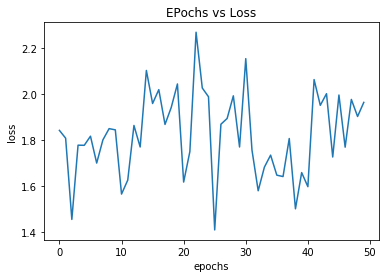

In [13]:
# PLotting the training loss vs epochs
plt.plot(range(epoch),trn_loss1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("EPochs vs Loss")

Text(0.5, 1.0, 'EPochs vs Loss')

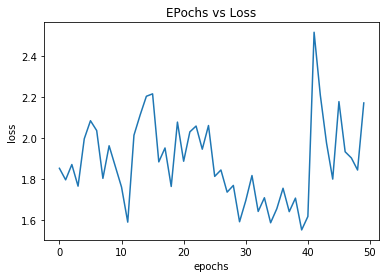

In [14]:
# Plotting the test loss vs epochs
plt.plot(range(epoch),tst_loss1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("EPochs vs Loss")

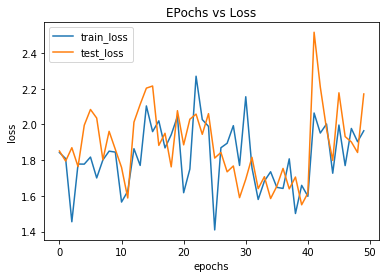

In [15]:
# Comparing the training loss and test loss
plt.plot(range(epoch),trn_loss1,label='train_loss')
plt.plot(range(epoch),tst_loss1,label='test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("EPochs vs Loss")
plt.legend()

In [16]:
# Accuracy of 1400 training data over each epoch in percentage
l_trn_accurate=[]
for i in trn_corr:
    l_trn_accurate.append(float(f'{i.item()/14:.2f}'))
print(l_trn_accurate)

[30.0, 37.14, 43.14, 43.64, 41.64, 37.36, 37.79, 37.93, 35.07, 35.64, 37.43, 35.57, 34.29, 34.71, 30.43, 26.21, 25.43, 25.36, 26.0, 27.79, 26.43, 30.79, 31.71, 32.07, 31.93, 33.0, 36.57, 34.79, 28.07, 32.14, 31.07, 32.21, 35.71, 42.36, 41.07, 41.57, 37.64, 40.29, 42.07, 44.0, 39.21, 33.21, 25.86, 29.79, 29.29, 31.5, 28.64, 27.21, 26.14, 27.29]


In [17]:
# Number of correct predictions out of 600 test data over each epoch
l_tst_accurate=[]
for i in tst_corr:
    l_tst_accurate.append(float(f'{i.item()/6:.2f}'))
print(l_tst_accurate)

[39.33, 40.33, 39.67, 40.67, 34.67, 37.83, 35.5, 31.67, 31.5, 31.33, 38.33, 44.5, 28.17, 28.17, 23.67, 20.83, 24.5, 24.5, 23.0, 25.67, 24.5, 26.83, 31.67, 31.17, 30.67, 33.5, 32.5, 29.17, 31.33, 31.67, 19.33, 27.5, 37.83, 33.67, 38.67, 39.5, 41.67, 36.0, 48.83, 45.5, 40.83, 26.67, 31.17, 21.17, 29.83, 23.83, 23.33, 28.5, 25.83, 29.17]


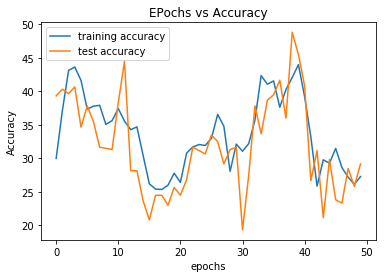

In [18]:
# Comparing the training accuracy and test accuracy
plt.plot(range(epoch),(l_trn_accurate),label='training accuracy')
plt.plot(range(epoch),(l_tst_accurate),label='test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title("EPochs vs Accuracy")
plt.legend()

In [20]:
for i,j in enumerate(range(5)):
    model_1.eval()
    with torch.no_grad():
        new_pred = model_1(test_data[i][0].view(-1,784)).argmax()
        if new_pred != test_data[i][1]:
            print(f"{i+1}.) Predicted value: {new_pred.item()}      Actual label:{test_data[i][1]}     Incorrect Prediction" )
        else:
            print(f"{i+1}.) Predicted value: {new_pred.item()}      Actual label:{test_data[i][1]}     Correct Prediction" )

1.) Predicted value: 1      Actual label:4     Incorrect Prediction
2.) Predicted value: 1      Actual label:1     Correct Prediction
3.) Predicted value: 1      Actual label:3     Incorrect Prediction
4.) Predicted value: 3      Actual label:4     Incorrect Prediction
5.) Predicted value: 0      Actual label:6     Incorrect Prediction
